<h1>CAPSTONE PROJECT</h1>
<h2>NATURAL LANGUAGE PROCESSING - CHATBOT INTERFACE</h2>

<h3>CONTEXT :<h3/>
<p>The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment<p/>
<h3>PROJECT OBJECTIVE :<h3/>
<p>Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description</p>

In [1]:
# Import required libraries
import pandas as pd
import datetime

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h3>Step 1: Import the data</h3>

In [2]:
# read the csv file
data = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [3]:
# Check first 10 rows
data.head(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [4]:
# # Check last 10 rows
data.tail(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
415,429,2017-06-23 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Others,Employee reports that by removing the zinc she...
416,430,2017-06-19 00:00:00,Country_03,Local_10,Others,III,IV,Male,Third Party,Others,During the execution of the task of assembling...
417,431,2017-06-22 00:00:00,Country_03,Local_10,Others,I,IV,Male,Employee,Others,The technician was returning from his activiti...
418,432,2017-06-22 00:00:00,Country_03,Local_10,Others,I,I,Male,Employee,Venomous Animals,"During the field activity in the AMG project, ..."
419,433,2017-06-29 00:00:00,Country_02,Local_02,Mining,I,III,Male,Employee,Pressed,After maintenance on Boltec 03 at level 285 GT...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


In [5]:
# Check shape of data
print('No of rows: ', data.shape[0])
print('No of columns: ', data.shape[1])

No of rows:  425
No of columns:  11


In [6]:
# check columns of data dataframe
data.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

<b>Observations:</b>
<p>1. Here column <b>'Unnamed: 0'</b> not required, as it is not relevant to data</p>
<p>2. We can remove column <b>'Unnamed: 0'</b></p>
<p>3. In dataset, all other columns are categorical columns except <b>'Date'</b> column </p><br/><br/>

<h3>Step 2: Data cleansing</h3>

In [7]:
# Dropping the 'Unnamed: 0' column as it is not required
data = data.drop('Unnamed: 0', axis=1)

In [8]:
# check columns of data dataframe
data.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [9]:
# Checking data-types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [10]:
# Checking if any null values in dataset
data.isnull().any()

Data                        False
Countries                   False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Genre                       False
Employee or Third Party     False
Critical Risk               False
Description                 False
dtype: bool

In [11]:
# Checking for duplicate values
data.duplicated().any()

True

In [12]:
# Checking for duplicate rows
data[data.duplicated() == True]

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


# Added by Sudha :
# Doubt : Since all below description are unique, we should not be dropping them, as Description column is important for develpoing chatbot responses 

In [13]:
Duplicates = data[data.duplicated() == True]
for i in range(len(Duplicates)):
    print("\n", Duplicates['Description'].iloc[i])


 In circumstances that two workers of the Abratech company were doing putty work inside the conditioning tank (5 meters deep and covered by platforms) of metal gratings - grating- in the upper part), two other employees of the HyT company carried out maneuvers transfer of a pump with the help of a manual tick - which worked hooked to a beam H, dragging the pump on the metal gratings (grating), suddenly the pump is hooked with a metal grate (grating) and when trying to release it, the metal grid (grating - 13.0 Kg. (60 cm x 92 cm)) falls inside the tank, hits a diagonal channel inside the tank and then impacts the right arm of one of the workers and rubs the helmet of the second worker that he was crouching. The area where the bomb was being moved was marked with tape and did not have a lookout.

 During the activity of chuteo of ore in hopper OP5; the operator of the locomotive parks his equipment under the hopper to fill the first car, it is at this moment that when it was blowing ou

In [14]:
# Dropping duplicate values
data = data.drop_duplicates()

In [15]:
# Checking shape of dataset
data.shape

(418, 10)

In [16]:
# Renaming the dataset columns
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

In [17]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description'],
      dtype='object')

<b>Observations:</b>
<p>1. We can convert date column into month wise, to have more clearity.</p>
<p>2. We can replace roman numbers with numbers to keep all column data in same format. i.e. I=1, II=2,.. V=5</p><br/><br/>

In [18]:
# Creating function which will convert number into month
def datetomonth(x):
    x = int(str(x).split('-')[1])
    month = datetime.date(1900, x, 1).strftime('%B')
    return month

def datetoyear(x):
    x = int(str(x).split('-')[0])
    return x

In [19]:
data['Month'] = data['Date'].apply(datetomonth)
data['Year'] = data['Date'].apply(datetoyear)

In [20]:
# Checking random 10 rows of dataset
data.sample(10)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Month,Year
143,2016-06-08 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Project of Vazante that carried out sediment c...,June,2016
295,2017-01-12 00:00:00,Country_02,Local_08,Metals,I,II,Male,Third Party (Remote),Manual Tools,"During the reduction activity in the tube, the...",January,2017
154,2016-06-17 00:00:00,Country_02,Local_08,Metals,IV,V,Male,Employee,\nNot applicable,"At approximately 5:45 pm, the operator Paulo (...",June,2016
145,2016-06-10 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Manual Tools,The employee reports that he was working with ...,June,2016
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",July,2017
318,2017-02-08 00:00:00,Country_01,Local_03,Mining,II,IV,Male,Third Party,Cut,"Being 12:20 hours Approximately, in circumstan...",February,2017
341,2017-02-27 00:00:00,Country_01,Local_03,Mining,II,IV,Male,Third Party,remains of choco,In the area of ​​Lloclla 50 meters from the su...,February,2017
196,2016-08-24 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The servant would remove the dishes from the b...,August,2016
222,2016-09-22 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Employee,Others,In circumstances in which the operator of bolt...,September,2016
149,2016-06-16 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees,Geologist and auxiliary Ademir traveled to the...,June,2016


In [21]:
# Dropping the 'Date' column as it is not required now (we have new column 'Month' and 'Year')
data = data.drop('Date', axis=1)

In [22]:
# Checking dataset columns
data.columns

Index(['Country', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description', 'Month', 'Year'],
      dtype='object')

In [23]:
# Print unique values for each column
for col in data.columns:
    if col != 'Description':
        print(f'Unique Values for column "{col}" - ', data[col].unique())
        print('\n')

Unique Values for column "Country" -  ['Country_01' 'Country_02' 'Country_03']


Unique Values for column "Local" -  ['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']


Unique Values for column "Industry Sector" -  ['Mining' 'Metals' 'Others']


Unique Values for column "Accident Level" -  ['I' 'IV' 'III' 'II' 'V']


Unique Values for column "Potential Accident Level" -  ['IV' 'III' 'I' 'II' 'V' 'VI']


Unique Values for column "Gender" -  ['Male' 'Female']


Unique Values for column "Employee type" -  ['Third Party' 'Employee' 'Third Party (Remote)']


Unique Values for column "Critical Risk" -  ['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall preven

In [24]:
# Replacing roman numbers with numbers to keep all column data in same format.
replace_text = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
data['Accident Level'] = data['Accident Level'].map(replace_text)
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_text)

In [25]:
# Check updated data
data.head()

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Month,Year
0,Country_01,Local_01,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,January,2016
1,Country_02,Local_02,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,January,2016
2,Country_01,Local_03,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,January,2016
3,Country_01,Local_04,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,January,2016
4,Country_01,Local_04,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,January,2016


<h3>Univariate Analysis</h3>

In [26]:
# Creating function for count_plot
def count_plot(df_column, fig_size=(10,8)):
    plt.figure(figsize=fig_size)
    sns.countplot(x=data[df_column])
    plt.show()

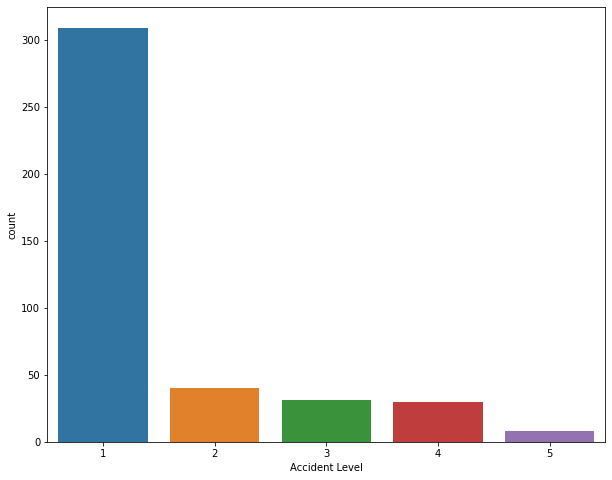

In [27]:
# Count plot for Accident Level
count_plot('Accident Level')

<h6><b>Accident level 1 is the most occured accident level of all the accidents in the dataset.</b></h6><br/><br/>

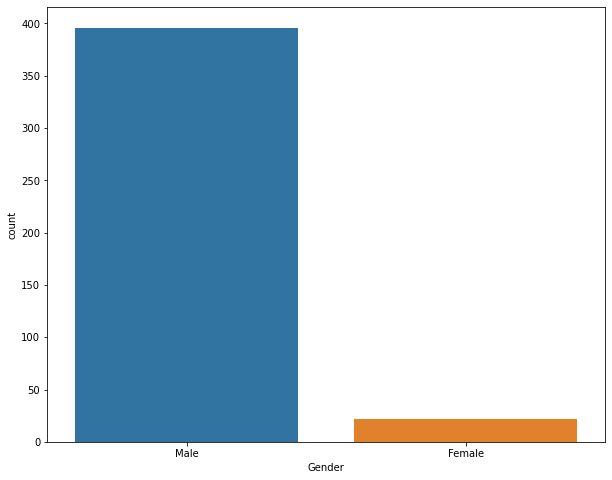

In [28]:
# Count plot for Gender
count_plot('Gender')

<h6><b>Most affected gender is Male in accidents.</b></h6><br/><br/>

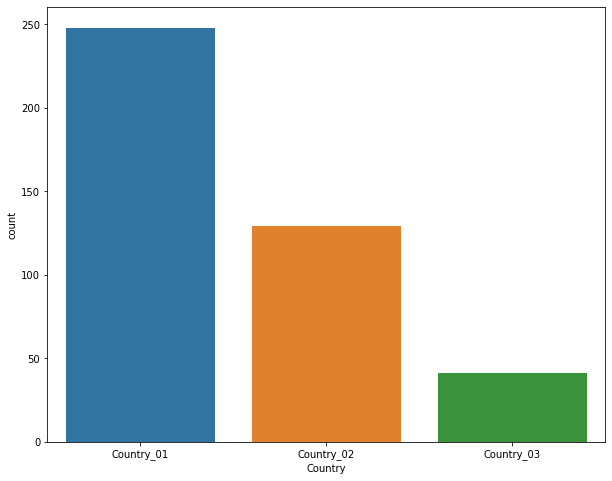

In [29]:
# Count plot for Country
count_plot('Country')

<h6><b>Country_01 has most no. of accidents.</b></h6><br/><br/>

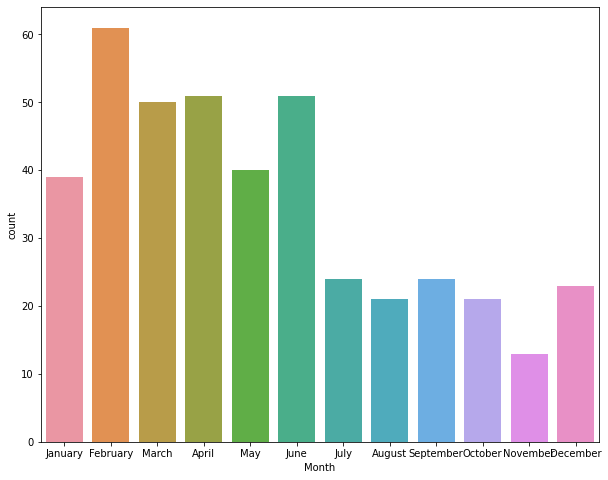

In [30]:
# Count plot for Month
count_plot('Month')

([<matplotlib.patches.Wedge at 0x1fddec08a60>,
 [Text(0.9864076066027491, 0.4868264923319564, 'February'),
  Text(0.29400645905218664, 1.0599812272090459, 'March'),
  Text(-0.5235421359161692, 0.9674211243922347, 'April'),
  Text(-1.0456500344265296, 0.3414908571306082, 'June'),
  Text(-1.0291928531026202, -0.38828091779340423, 'May'),
  Text(-0.635815794793305, -0.897629252582244, 'January'),
  Text(-0.15654630124901567, -1.0888035890670331, 'December'),
  Text(0.2378593840314214, -1.0739752852967301, 'September'),
  Text(0.594704914953925, -0.9253788759906101, 'July'),
  Text(0.8629521938156058, -0.6821389236723214, 'October'),
  Text(1.0320819971806812, -0.38053482244800774, 'August'),
  Text(1.0947537275951105, -0.10730459410766524, 'November')],
 [Text(0.5380405126924085, 0.265541723090158, '14.59%'),
  Text(0.16036715948301086, 0.5781715784776613, '12.20%'),
  Text(-0.2855684377724559, 0.5276842496684916, '12.20%'),
  Text(-0.5703545642326525, 0.18626774025305903, '11.96%'),
  Te

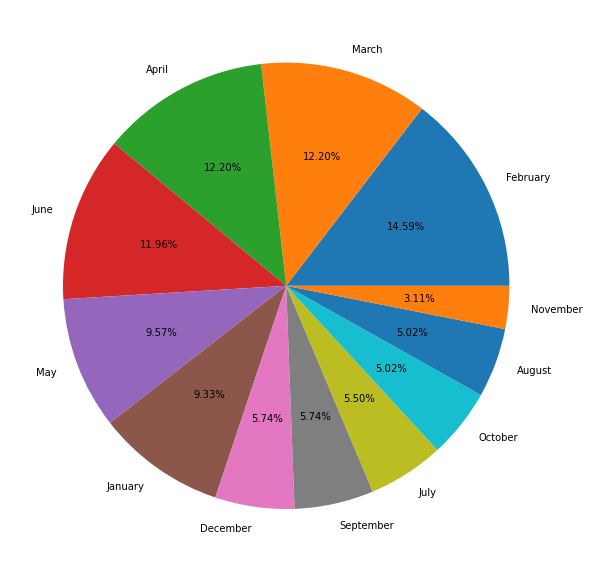

In [31]:
# Pie plot for Month
plt.figure(figsize=(10,15))
plt.pie(data['Month'].value_counts(), labels=['February', 'March','April', 'June','May', 'January','December', 'September','July', 'October','August', 'November'], autopct = '%1.2f%%')

<h6><b>Most no. of accidents are occured in February with percentage of 14.59%</b></h6><br/><br/>

In [32]:
data['Month'].value_counts()

February     61
April        51
June         51
March        50
May          40
January      39
July         24
September    24
December     23
August       21
October      21
November     13
Name: Month, dtype: int64

<h6><b>Most no. of accidents are occured in first 5-6 months</b></h6><br/><br/>

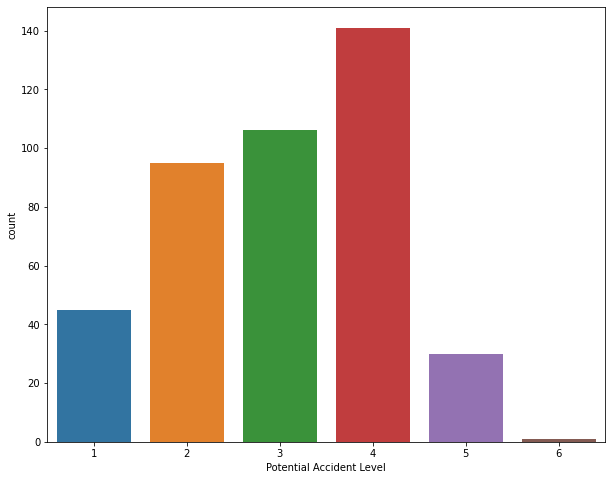

In [33]:
# Count plot for Potential Accident Level
count_plot('Potential Accident Level')

<h6><b>Potential Accident level IV is the most occured potential accident level of all the accidents in the dataset.</b></h6><br/><br/>

([<matplotlib.patches.Wedge at 0x1fde12e5c70>,
 [Text(-0.34672296262258645, 1.1488181697684872, ''),
  Text(-0.01773671706401008, -1.1798666911426017, ''),
  Text(1.0481869978736906, -0.333622567414945, '')],
 [Text(-0.2022550615298421, 0.6701439323649508, '59.33%'),
  Text(-0.010221158986039706, -0.679923177946584, '30.86%'),
  Text(0.5717383624765585, -0.18197594586269727, '9.81%')])

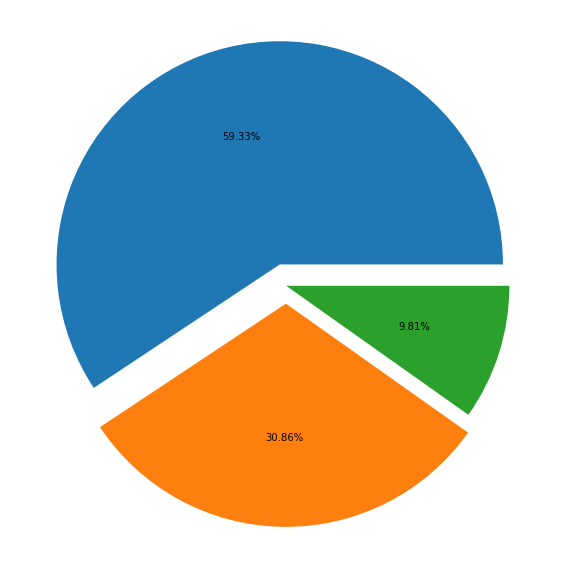

In [34]:
# Pie plot for Country
plt.figure(figsize=(10,15))
#plt.pie(data['Country'].value_counts(), labels=[], explode=(0.1,0.08,0),autopct = '%1.2f%%')
plt.pie(data['Country'].value_counts(), explode=(0.1,0.08,0),autopct = '%1.2f%%')

<h6><b>Most affected country with accidents is Country_01 with percentage of 59.33%</b></h6><br/><br/>

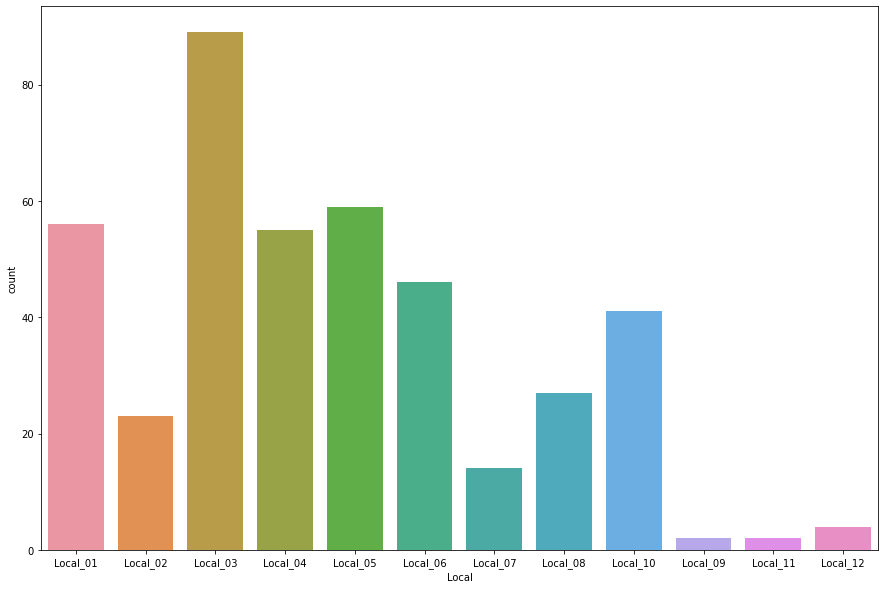

In [35]:
# Count plot for Local
count_plot('Local',(15,10))

<h6><b>Most affected Area with accidents is Local_03</b></h6><br/><br/>

([<matplotlib.patches.Wedge at 0x1fddeb0f970>,
 [Text(0.8629521938156061, 0.6821389236723211, 'Local_03'),
  Text(-0.22978093954979237, 1.0757326432806689, 'Local_05'),
  Text(-0.9674211121378463, 0.5235421585602946, 'Local_01'),
  Text(-1.0376852110137018, -0.3649786334067369, 'Local_04'),
  Text(-0.5015981636107191, -0.9789786934670001, 'Local_06'),
  Text(0.19734216679047287, -1.0821534406942674, 'Local_10'),
  Text(0.7014211618717858, -0.8473537358614962, 'Local_08'),
  Text(0.9634590155522648, -0.5307981964466921, 'Local_02'),
  Text(1.0721572757931985, -0.24592432975146533, 'Local_07'),
  Text(1.095529274130298, -0.09907375799646861, 'Local_12'),
  Text(1.0988817498411474, -0.049587295409793924, 'Local_09'),
  Text(1.099875731135605, -0.01653408778609066, 'Local_11')],
 [Text(0.4707011966266942, 0.37207577654853874, '21.29%'),
  Text(-0.12533505793625035, 0.5867632599712739, '14.11%'),
  Text(-0.5276842429842797, 0.28556845012379706, '13.40%'),
  Text(-0.5660101150983827, -0.1990

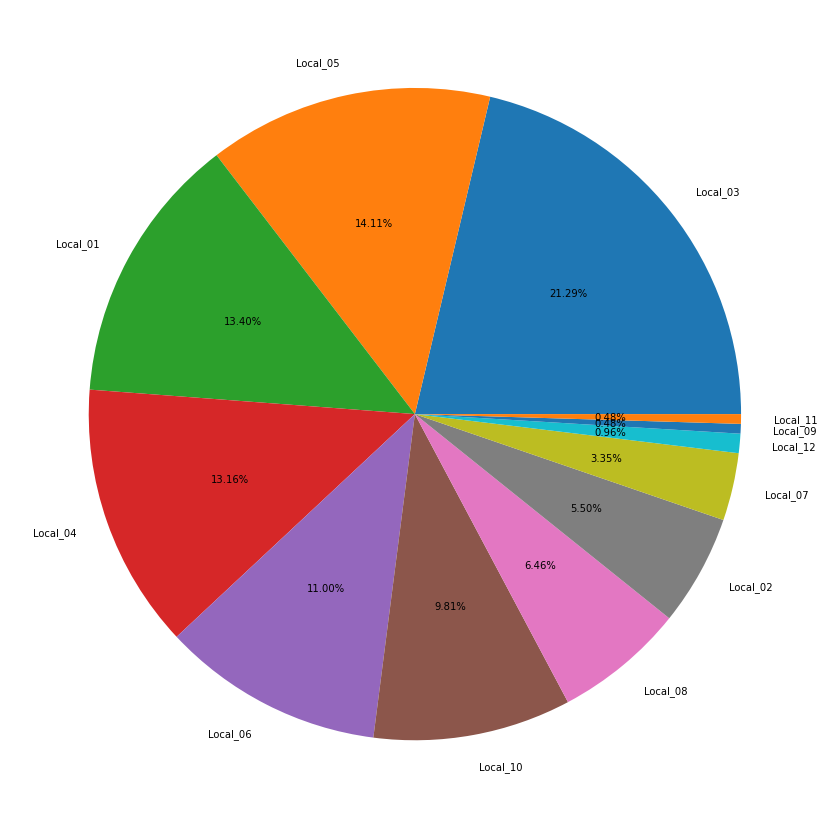

In [36]:
# Pie plot for Local
plt.figure(figsize=(15,15))
plt.pie(data['Local'].value_counts(), labels=['Local_03', 'Local_05', 'Local_01', 'Local_04', 'Local_06', 'Local_10', 'Local_08', 'Local_02', 'Local_07', 'Local_12', 'Local_09', 'Local_11'],autopct = '%1.2f%%')

<h6><b>Most affected Area with accidents is Local_03 with percentage of 21.29%</b></h6><br/><br/>

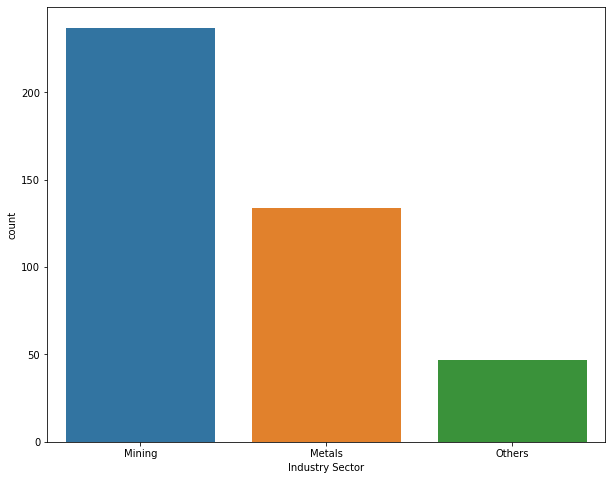

In [37]:
# Count plot for Industry Sector
count_plot('Industry Sector')

<h6><b>Most affected Industry Sector with accidents is Mining</b></h6><br/><br/>

([<matplotlib.patches.Wedge at 0x1fddead8640>,
 [Text(-0.22978104026715013, 1.07573262176702, 'Mining'),
  Text(-0.15654617382257752, -1.0888036073881788, 'Metals Industry Sector'),
  Text(1.0320820417159757, -0.3805347016598924, 'Others')],
 [Text(-0.12533511287299096, 0.5867632482365563, '56.70%'),
  Text(-0.08538882208504228, -0.5938928767571884, '32.06%'),
  Text(0.5629538409359867, -0.20756438272357763, '11.24%')])

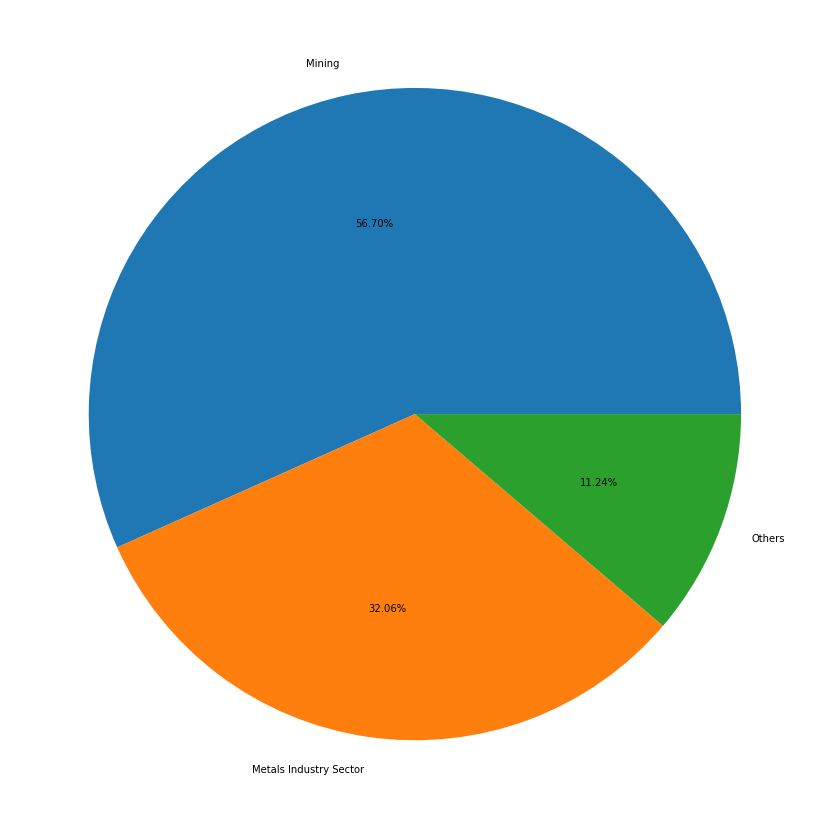

In [38]:
# Pie plot for Local
plt.figure(figsize=(15,15))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals Industry Sector', 'Others'],autopct = '%1.2f%%')

<h6><b>Most affected Industry Sector with accidents is Mining with percentage of 56.70%</b></h6><br/><br/>

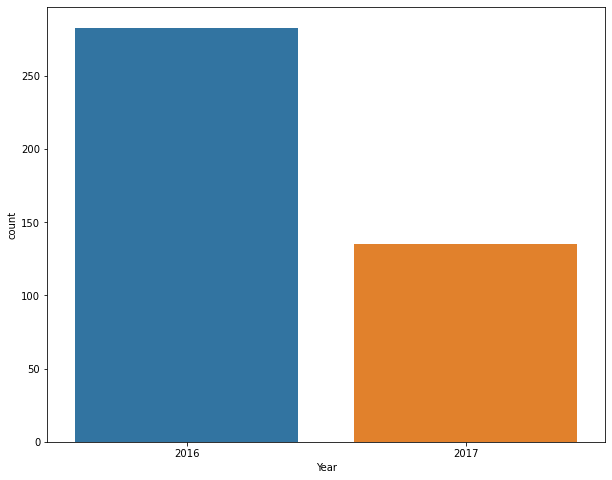

In [39]:
# Count plot for Year
count_plot('Year')

<h6><b>More accidents happened in Year 2016 compared to 2017</b></h6><br/><br/>

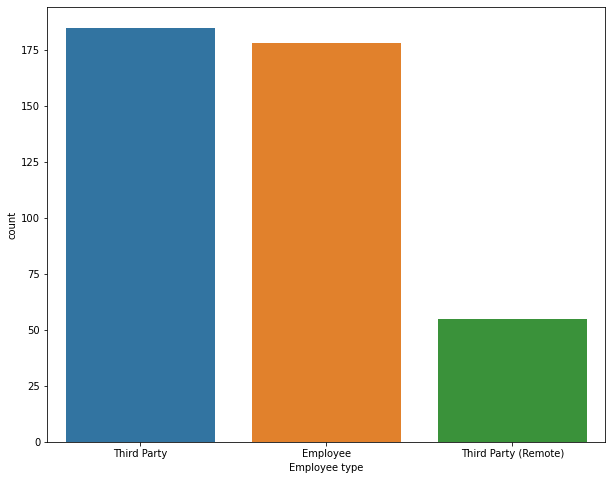

In [40]:
# Count Plot for Employee type
count_plot('Employee type')

([<matplotlib.patches.Wedge at 0x1fddeed8af0>,
 [Text(0.19734214146084375, 1.0821534453133939, 'Third Party'),
  Text(-0.6154167706080156, -0.9117358161520263, 'Employee'),
  Text(1.007350652788397, -0.441864982010105, 'Third Party (Remote)')],
 [Text(0.10764116806955114, 0.5902655156254875, '44.26%'),
  Text(-0.3356818748770994, -0.49731044517383244, '42.58%'),
  Text(0.5494639924300347, -0.24101726291460268, '13.16%')])

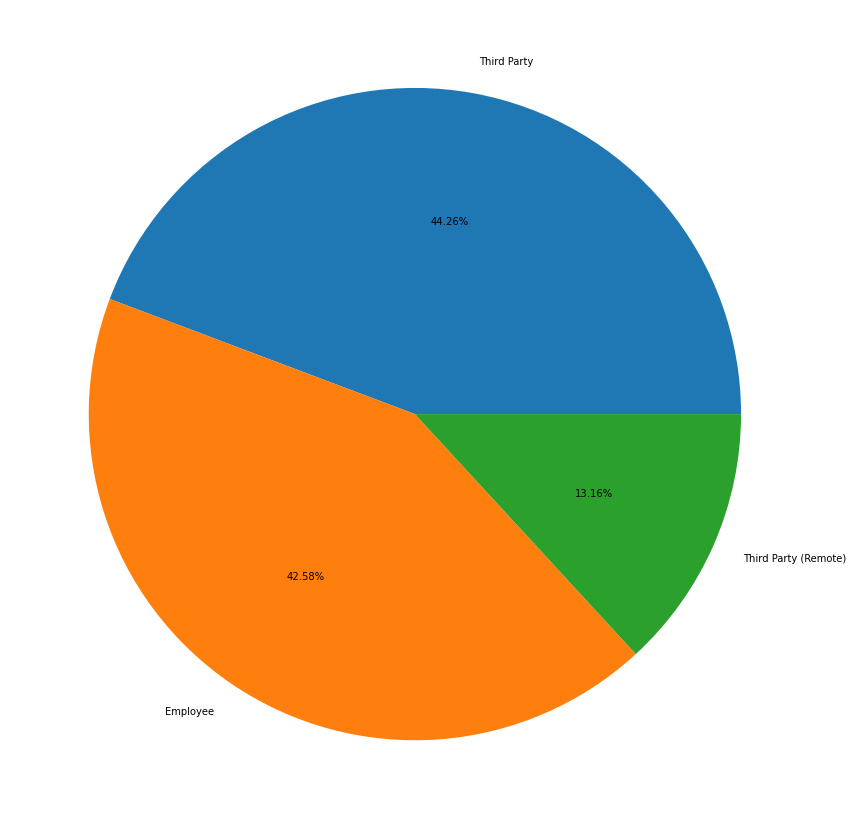

In [41]:
# Pie plot for Employee type
plt.figure(figsize=(15,15))
plt.pie(data['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'],autopct = '%1.2f%%')

<h6><b>Most affected Employee type are Third party workers</b></h6><br/><br/>

<h3>Multivariate Analysis</h3>

In [42]:
# Function to plot multivariate countplot
def multivariate_countplot(column1, column2, column3):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20,7)
    sns.countplot(x=data[column1], hue = data[column2],ax = ax1)
    ax1.set_title(f'{column1} Vs {column2}\n',fontsize = 15)
    sns.countplot(x=data[column1],hue = data[column3],ax=ax2)
    ax2.set_title(f'{column1} Vs {column3}\n',fontsize = 15)
    plt.show()

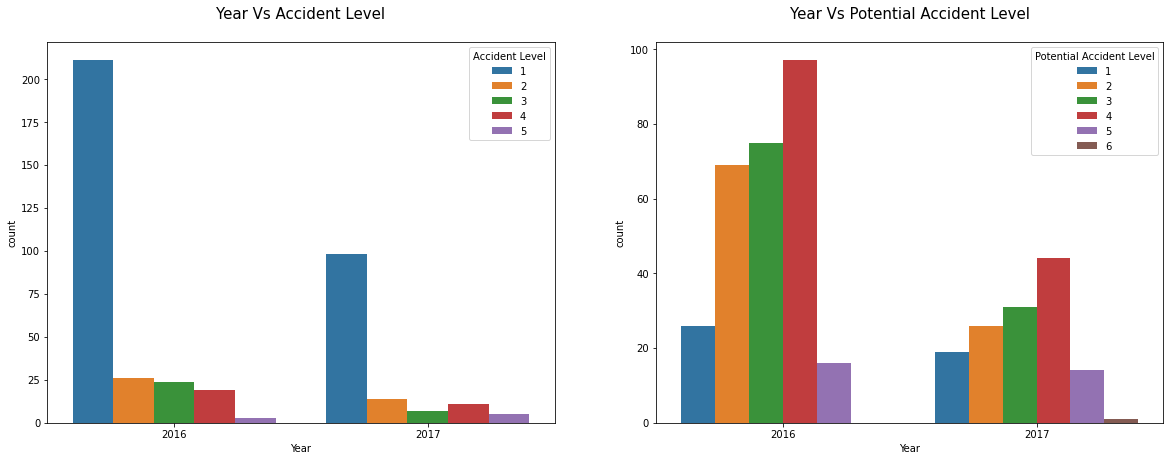

In [43]:
multivariate_countplot('Year', 'Accident Level', 'Potential Accident Level')

<h6><b>Year vs Accident level</b></h6>
<p>1. Level 1 accidents rate is more in 2016 compared to 2017</p>
<p>2. Overall more accidents happened in 2016 compared to 2017</p><br/>
<h6><b>Year vs Potential Accident level</b></h6>
<p>1. Level 4, Level 3, Level 2 accidents rate is more in 2016 compared to 2017</p>
<p>2. Overall more accidents happened in 2016 compared to 2017</p><br/><br/>

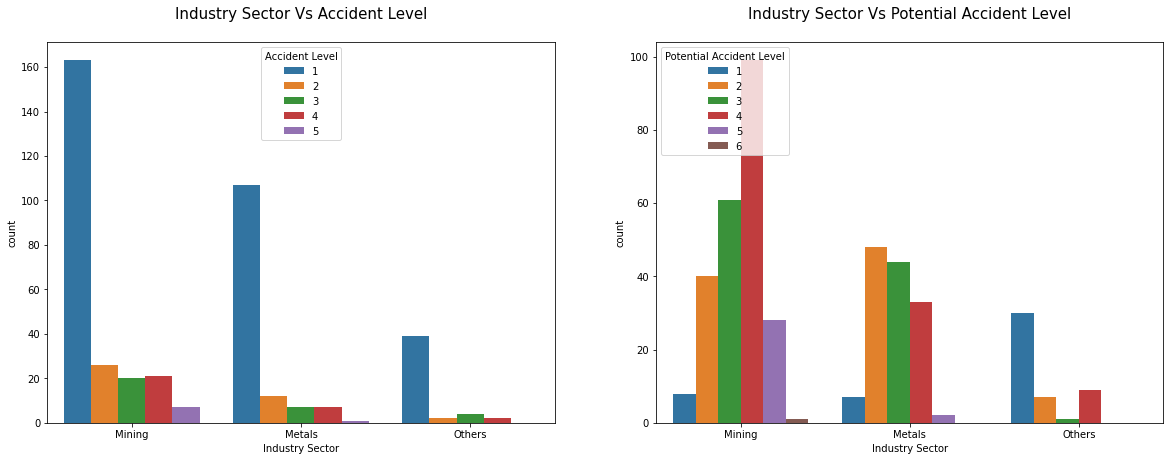

In [44]:
multivariate_countplot('Industry Sector', 'Accident Level', 'Potential Accident Level')

<h6><b>Industry Sector vs Accident level</b></h6>
<p>1. Level 1 accidents rate is more in Mining sector compared to all other sectors</p>
<p>2. Overall more accidents happened in mining sector compared to all other</p><br/>
<h6><b>Industry Sector vs Potential Accident level</b></h6>
<p>1. Level 4, Level 3, Level 2 accidents rate is more in mining sector compared to all other</p>
<p>2. Overall more accidents happened in mining sector compared to all other</p><br/><br/>

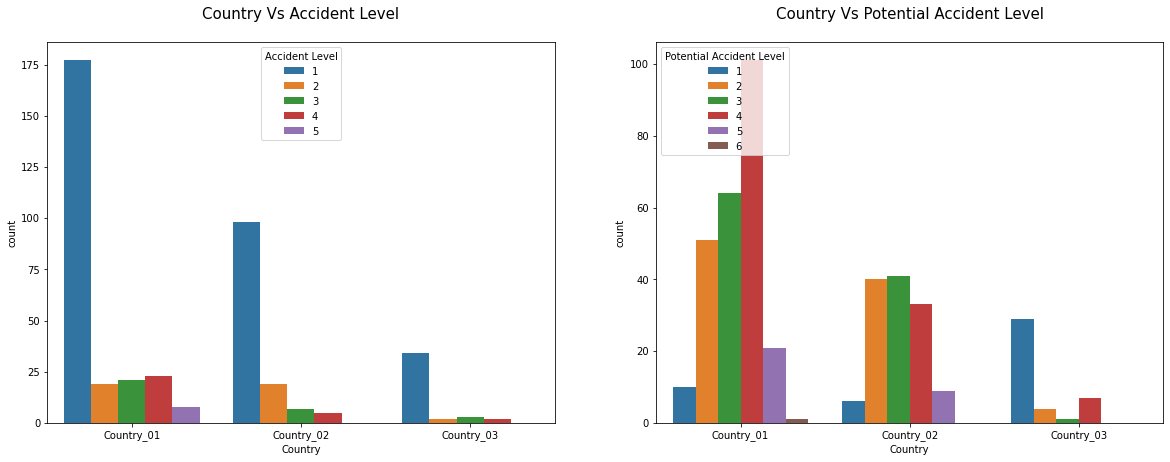

In [45]:
multivariate_countplot('Country', 'Accident Level', 'Potential Accident Level')

<h6><b>Country vs Accident level</b></h6>
<p>1. Level 1 accidents rate is more in Country_01 compared to all other sectors</p>
<p>2. Overall more accidents happened in Country_01 compared to all other</p><br/>
<h6><b>Country vs Potential Accident level</b></h6>
<p>1. Level 4, Level 3, Level 2 accidents rate is more in Country_01 compared to all other</p>
<p>2. Overall more accidents happened in Country_01 compared to all other</p><br/><br/>

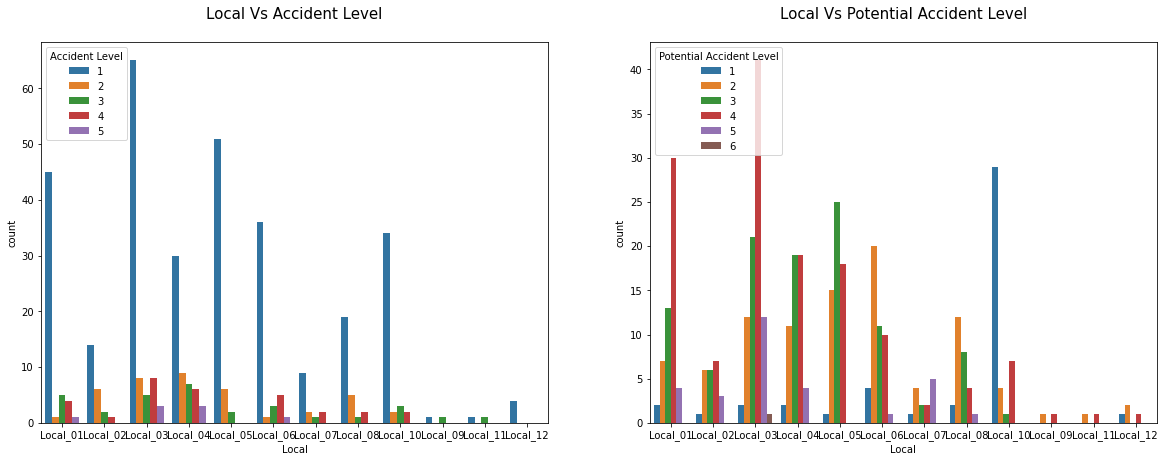

In [46]:
multivariate_countplot('Local', 'Accident Level', 'Potential Accident Level')

<h6><b>Local vs Accident level</b></h6>
<p>1. Level 1 accidents rate is more in Local_01 - Local_10</p>
<p>2. Local_09, Local_11 and Local_12 observed very less accidents compared to all other Local areas</p>
<p>3. Overall more accidents happened in Local_03 compared to all other</p><br/>
<h6><b>Local vs Potential Accident level</b></h6>
<p>1. Level 4, Level 3, Level 2 accidents rate is more in Local_01 - Local_10</p>
<p>2. Local_09, Local_11 and Local_12 observed very less accidents compared to all other Local areas</p><br/><br/>

<AxesSubplot:xlabel='Local', ylabel='count'>

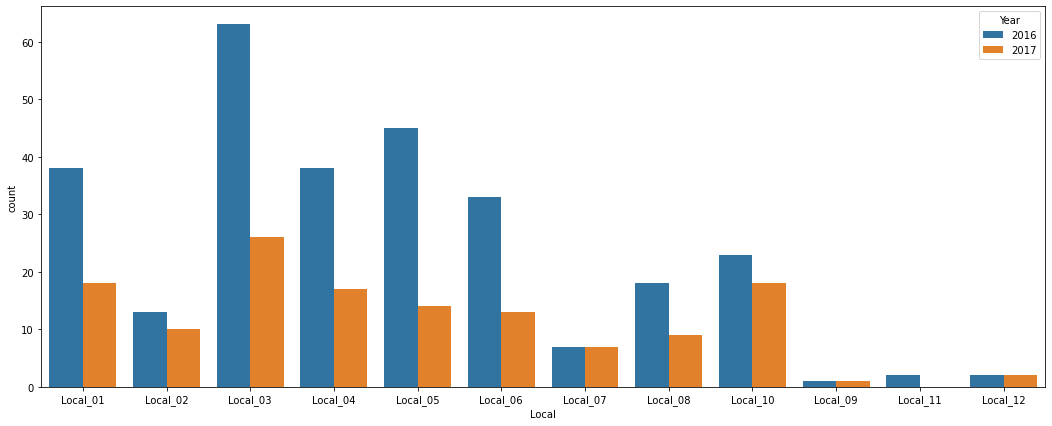

In [47]:
plt.figure(figsize=(18,7))
sns.countplot(x=data["Local"],hue=data["Year"])

<h6><b>Local vs Year</b></h6>
<p>1. Year 2016 observed more accidents in local areas compared to Year 2017</p>
<p>2. Overall more accidents happened in Year 2016 compared to Year 2017</p><br/>

<AxesSubplot:xlabel='Country', ylabel='count'>

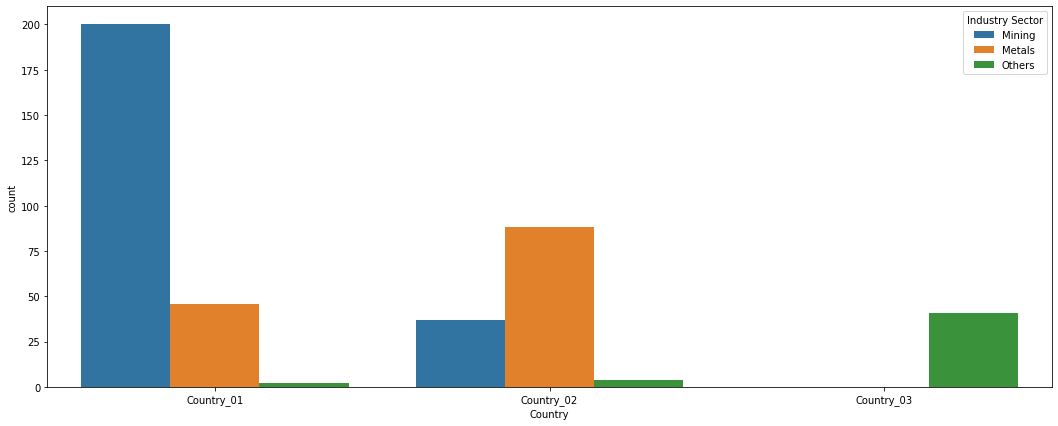

In [48]:
plt.figure(figsize=(18,7))
sns.countplot(x=data['Country'],hue=data['Industry Sector'])

<h6><b>Country vs Industry Sector</b></h6>
<p>1. Country_01 observed more accidents in Mining Sector compare to Metals & Others</p>
<p>2. Overall more accidents happened in Country_01 compared to Country_02 & Country_03</p>
<p>3. Country_02 observed more accidents in Metals Sector compare to Mining & Others</p><br/>

<AxesSubplot:xlabel='Country', ylabel='count'>

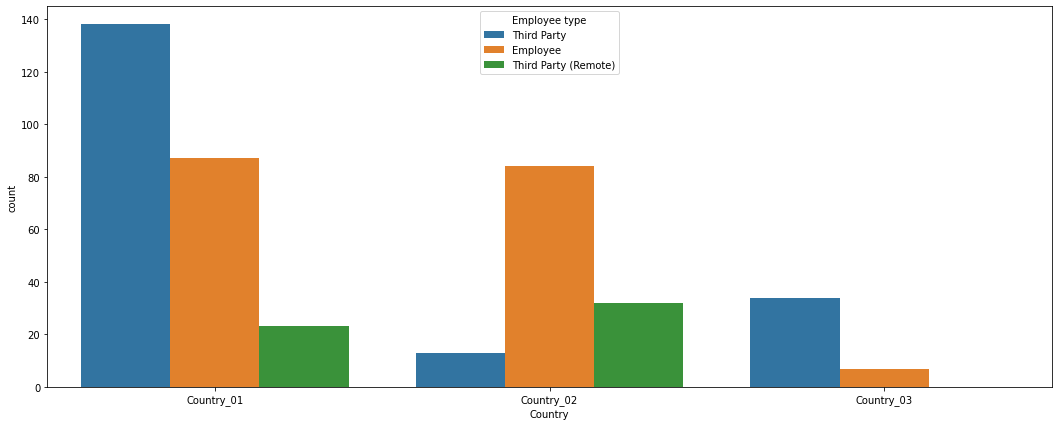

In [49]:
plt.figure(figsize=(18,7))
sns.countplot(x=data['Country'],hue=data['Employee type'])

<h6><b>Country vs Employee type</b></h6>
<p>1. Country_01 has Employee type of Third Party high in number.</p>
<p>2. Overall more accidents happened in Country_01 compared to Country_02 & Country_03</p>
<p>3. Country_03 has observed very less accidents compared to other countries</p><br/>

# Step 3: Data preprocessing (NLP Preprocessing techniques)

Few of the NLP pre-processing steps taken before applying model on the data 

1. Displaying Line Length and the number of words of each line in Description column before pre-processing 
2. Eliminate All special Characters and Numbers
3. Converting to lower case, avoid any capital cases
4. Remove all extra white spaces
5. Converting apostrophe to the standard lexicons
6. Removing punctuations
7. Lemmatization
8. Removing stop words
9. Removing multiple spaces between words
10. Displaying Line Length and the number of words of each line in Description column after pre-processing 


In [50]:
# Importing Libraries
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string
from nltk.corpus import stopwords


In [51]:
data.Description 

0      While removing the drill rod of the Jumbo 08 f...
1      During the activation of a sodium sulphide pum...
2      In the sub-station MILPO located at level +170...
3      Being 9:45 am. approximately in the Nv. 1880 C...
4      Approximately at 11:45 a.m. in circumstances t...
                             ...                        
420    Being approximately 5:00 a.m. approximately, w...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At 10:00 a.m., when the assistant cleaned the ...
Name: Description, Length: 418, dtype: object

In [52]:
#1. Displaying Line Length and the number of words of each line in Description column before pre-processing 

print('--'*45); print("BEFORE NLP PREPROCESSING.... \n")

# Get length of each line
data['line_length_before_preprocessing'] = data['Description'].str.len()

print('Minimum line length: {} \n'.format(data['line_length_before_preprocessing'].min()))
print('Maximum line length: {} \n'.format(data['line_length_before_preprocessing'].max()))
print('Line with maximum length: \n\n {}\n'.format(data[data['line_length_before_preprocessing'] == data['line_length_before_preprocessing'].max()]['Description'].values[0]))

print('--'*45); 

# Get number of words of each line
data['nb_words_before_prepocessing'] = data['Description'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}\n'.format(data['nb_words_before_prepocessing'].min()))
print('Maximum number of words: {}\n'.format(data['nb_words_before_prepocessing'].max()))
print('Line with maximum number of words: \n\n {}\n'.format(data[data['nb_words_before_prepocessing'] == data['nb_words_before_prepocessing'].max()]['Description'].values[0]))

------------------------------------------------------------------------------------------
BEFORE NLP PREPROCESSING.... 

Minimum line length: 94 

Maximum line length: 1029 

Line with maximum length: 

 When performing the sleeve removal maneuver, when the hole was 600 meters deep, General da Silva pressed only one side of the locking nut of the rods, which together with the jack, holds the entire weight of the rods in the maneuver. As the locking procedure was not effective, the weight of the rods was only secured by the steel wire rope of the probe winch. At the moment that driller Pedro released the brake of the winch, the inefficacy of the locking done only in one side of the chestnut and without aid of the monkey, caused the sliding of the rods. Auxiliary was prepared for manual unlocking of the rods, holding the faucet key firmly against the probe tower as the composition shifted. As the stems slid, his hands were shifted downward, causing his left hand to strike against the ba

In [53]:
#2. Eliminate All special Characters and Numbers 
print('--'*30); print('Eliminating All special Characters and Numbers')
data['Cleaned_Description'] = data['Description'].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
data['Cleaned_Description']

------------------------------------------------------------
Eliminating All special Characters and Numbers


0      While removing the drill rod of the Jumbo for ...
1      During the activation of a sodium sulphide pum...
2      In the sub station MILPO located at level when...
3      Being am approximately in the Nv CX OB the per...
4      Approximately at a m in circumstances that the...
                             ...                        
420    Being approximately a m approximately when lif...
421    The collaborator moved from the infrastructure...
422    During the environmental monitoring activity i...
423    The Employee performed the activity of strippi...
424    At a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [54]:
#3. Converting to lower case, avoid any capital cases
print('--'*30); print('Converting description to lower case')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x : x.lower())
data['Cleaned_Description'] 

------------------------------------------------------------
Converting description to lower case


0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level when...
3      being am approximately in the nv cx ob the per...
4      approximately at a m in circumstances that the...
                             ...                        
420    being approximately a m approximately when lif...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [55]:
#4. Remove all extra white spaces
print('--'*30); print('Remove all extra white spaces')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda s: s.strip())
data['Cleaned_Description'] 

------------------------------------------------------------
Remove all extra white spaces


0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level when...
3      being am approximately in the nv cx ob the per...
4      approximately at a m in circumstances that the...
                             ...                        
420    being approximately a m approximately when lif...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [56]:
#5. Converting apostrophe to the standard lexicons

In [57]:
pip install contractions

In [58]:
import contractions

for i in range(len(data)):
    contractions.fix(data['Cleaned_Description'].iloc[i])

In [59]:
data['Cleaned_Description'] 

0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level when...
3      being am approximately in the nv cx ob the per...
4      approximately at a m in circumstances that the...
                             ...                        
420    being approximately a m approximately when lif...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [60]:
#6. Removing punctuations
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in string.punctuation]))
data['Cleaned_Description']

0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level when...
3      being am approximately in the nv cx ob the per...
4      approximately at a m in circumstances that the...
                             ...                        
420    being approximately a m approximately when lif...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [61]:
#7. Lemmatization
from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()

In [62]:
data['Cleaned_Description']  = data['Cleaned_Description'] .apply(lambda x: ' '.join([wordNet.lemmatize(i) for i in x.split(" ")]))
data['Cleaned_Description'] 

0      while removing the drill rod of the jumbo for ...
1      during the activation of a sodium sulphide pum...
2      in the sub station milpo located at level when...
3      being am approximately in the nv cx ob the per...
4      approximately at a m in circumstance that the ...
                             ...                        
420    being approximately a m approximately when lif...
421    the collaborator moved from the infrastructure...
422    during the environmental monitoring activity i...
423    the employee performed the activity of strippi...
424    at a m when the assistant cleaned the floor of...
Name: Cleaned_Description, Length: 418, dtype: object

In [63]:
#8. Removing stop words 
stopwords = set(stopwords.words('english'))
data['Cleaned_Description']  = data['Cleaned_Description'] .apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
data['Cleaned_Description'] 

0      removing drill rod jumbo maintenance superviso...
1      activation sodium sulphide pump piping wa unco...
2      sub station milpo located level collaborator w...
3      approximately nv cx ob personnel begin task un...
4      approximately circumstance mechanic anthony gr...
                             ...                        
420    approximately approximately lifting kelly hq t...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    assistant cleaned floor module e central camp ...
Name: Cleaned_Description, Length: 418, dtype: object

In [64]:
#9.Removing multiple spaces between words
print('Removing multiple spaces between words')
data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: re.sub(' +', ' ', x))
data['Cleaned_Description'] 

Removing multiple spaces between words


0      removing drill rod jumbo maintenance superviso...
1      activation sodium sulphide pump piping wa unco...
2      sub station milpo located level collaborator w...
3      approximately nv cx ob personnel begin task un...
4      approximately circumstance mechanic anthony gr...
                             ...                        
420    approximately approximately lifting kelly hq t...
421    collaborator moved infrastructure office julio...
422    environmental monitoring activity area employe...
423    employee performed activity stripping cathode ...
424    assistant cleaned floor module e central camp ...
Name: Cleaned_Description, Length: 418, dtype: object

In [65]:
#10. Displaying Line Length and the number of words of each line in Description column after pre-processing : 

In [66]:
print("AFTER NLP PREPROCESSING... \n")
print('--'*45); print('Get the length of each line, find the maximum length and print the maximum length line \n'); 
#print('Length of line ranges from 64 to 672.'); print('--'*45)

# Get length of each line
data['line_length'] = data['Cleaned_Description'].str.len()

print('Minimum line length: {} \n'.format(data['line_length'].min()))
print('Maximum line length: {} \n'.format(data['line_length'].max()))
print('Line with maximum length: {} \n'.format(data[data['line_length'] == data['line_length'].max()]['Cleaned_Description'].values[0]))

print('--'*45); print('Get the number of words, find the maximum number of words and print the maximum number of words \n'); 

# Get length of each line
data['nb_words'] = data['Cleaned_Description'].apply(lambda x: len(x.split(' ')))

# Get number of words in each line
print('Minimum number of words: {} \n'.format(data['nb_words'].min()))
print('Maximum number of words: {} \n'.format(data['nb_words'].max()))
print('Line with maximum number of words: {} \n'.format(data[data['nb_words'] == data['nb_words'].max()]['Cleaned_Description'].values[0]))

AFTER NLP PREPROCESSING... 

------------------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line 

Minimum line length: 61 

Maximum line length: 666 

Line with maximum length: level gallery holding activity bolter equipment operator performs drilling first hole support right gable foot deep drill wa end drill rod break leaving thread inside drilling machine shank operator assistant decide make two empty percussion attempt free thread shank without success third attempt assistant enters corrugated iron central hole rest bar embedded shank generate pressure moment operator activates percussion generates movement shank hit palm victim left hand generating described injury worker wa wearing safety glove time accident end corrugated iron contact left hand shaped like cane worker time accident wa positioned roof supported mesh split set 

-------------------------------------------

In [67]:
print("Before NLP Pre-processing")
print("----"*30)
print('Minimum line length: {}'.format(data['line_length_before_preprocessing'].min()))
print('Maximum line length: {} \n'.format(data['line_length_before_preprocessing'].max()))
print("After NLP Pre-processing")
print("----"*30)
print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {} \n'.format(data['line_length'].max()))
print("Before NLP Pre-processing")
print("----"*30)
print('Minimum number of words: {}'.format(data['nb_words_before_prepocessing'].min()))
print('Maximum number of words: {}\n'.format(data['nb_words_before_prepocessing'].max()))
print("After NLP Pre-processing")
print("----"*30)
print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {} \n'.format(data['nb_words'].max()))

Before NLP Pre-processing
------------------------------------------------------------------------------------------------------------------------
Minimum line length: 94
Maximum line length: 1029 

After NLP Pre-processing
------------------------------------------------------------------------------------------------------------------------
Minimum line length: 61
Maximum line length: 666 

Before NLP Pre-processing
------------------------------------------------------------------------------------------------------------------------
Minimum number of words: 16
Maximum number of words: 183

After NLP Pre-processing
------------------------------------------------------------------------------------------------------------------------
Minimum number of words: 9
Maximum number of words: 102 



In [68]:
print('--'*30); print('Five point summary for number of words')
display(data['nb_words'].describe().round(0).astype(int)); 

print('99% quantilie: {}'.format(data['nb_words'].quantile(0.99)));print('--'*30)

------------------------------------------------------------
Five point summary for number of words


count    418
mean      34
std       16
min        9
25%       22
50%       31
75%       43
max      102
Name: nb_words, dtype: int32

99% quantilie: 81.0
------------------------------------------------------------


# NLP Summary - Observation :

1. There are few alphanumeric characters like 042-TC-06, Nv. 3370, CX 212 etc  which were captured in description and thus are removed.
2. Words are converted to lower cases and thus avoiding words in upper case being treated as separate word from lower case words.
3. All white spaces and multiple spaces between words are removed.
4. Contraction library is used to replace contracted words with the two-word version of the contraction (eg: he's to he is)
5. Lemmatization done to reduce words to its root words without losing context.
6. Finally removing common english stopwords like articles, conjunction to get keywords which will help in building an efficient NLP classifier model.
7. Minimum Line Length has reduced from 94 to 61 after pre-processing
8. Maximum Line Length has reduced from 1029 to 666 after pre-processing
9. Minimum Number of words has reduced from 16 to 9 after pre-processing
10. Maximum  Number of words has reduced from 183 to 102 after pre-processing
11. After pre-processing, Average number of words in Description column is 34 words, 99% of sentences in Description has 81 words.



In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [70]:
from wordcloud import WordCloud

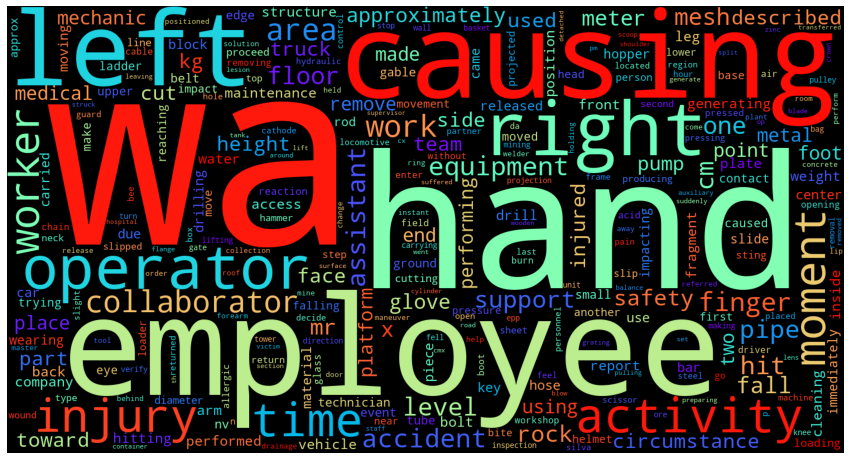

In [71]:
wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False).generate(" ".join(data['Cleaned_Description'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Cloud Observation:

There are many employee related, body-related,work-related, equipment-related.accident-related words, Safety - related words.

1. Employee-related words: employee, operator, collaborator,assitant,worker
2. Body-related words: HAND, left,right,finger,face
3. Equipment-related words: equipment, pump,pipe,truck
4. Accident-related words : INJURY, Accident, injured, hit,fall, cut
5. Work-related words : Activity, maintainance, Inspection, mechanic, carried, remove
6. Safety - related words: Safety,glove


## ***Model Building***

#### SVC Model using CountVectorizer

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
#Target label - Accident level
X = data['Cleaned_Description']
ya = data['Accident Level']

cnt_vec = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xc = cnt_vec.fit_transform(X).toarray()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, ya, test_size=0.15, random_state=42)

print("Xc_train shape: ",Xc_train.shape)
print("Xc_test shape: ", Xc_test.shape)
svc = LinearSVC( max_iter=5500)
svc.fit(Xc_train, yc_train)
yc_pred1 = svc.predict(Xc_test)

# Evaluation
acc_svc = accuracy_score(yc_test, yc_pred1)
acc_svc_tr = svc.score(Xc_train, yc_train)
print("Train accuracy of the SVC model : {:.2f}".format(acc_svc_tr*100))
print("Test accuracy of the SVC model : {:.2f}".format(acc_svc*100))
#print('Classification report:',classification_report(yc_test, yc_pred01))

Xc_train shape:  (355, 13415)
Xc_test shape:  (63, 13415)
Train accuracy of the SVC model : 99.44
Test accuracy of the SVC model : 74.60


In [101]:
#Target label - Potential Accident level
X = data['Cleaned_Description']
yp = data['Potential Accident Level']

cnt_vecp = CountVectorizer(analyzer='word', ngram_range=(1, 2))
Xp = cnt_vecp.fit_transform(X).toarray()
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.15, random_state=42)

svcp = LinearSVC( max_iter=5500)
svcp.fit(Xp_train, yp_train)
yp_pred2 = svcp.predict(Xp_test)

# Evaluation
accp_svc = accuracy_score(yp_test, yp_pred2)
accp_svc_tr = svcp.score(Xp_train,yp_train)

print("Test accuracy of the SVC model : {:.2f}".format(accp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(accp_svc_tr*100))

Test accuracy of the SVC model : 34.92
Train accuracy of the SVC model : 99.72


#### SVC Model using TF-IDF

In [102]:
#Target label - Accident level
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1,2))
Xt = tfidf_vec.fit_transform(X).toarray()

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, ya, test_size=0.15, random_state=42)

svct = LinearSVC(max_iter=5500)
svct.fit(Xt_train, yt_train)
yt_pred3 = svct.predict(Xt_test)

# Evaluation
acct_svc = accuracy_score(yt_test, yt_pred3)
acct_svc_tr = svct.score(Xt_train,yt_train)

print("Test accuracy of the SVC model : {:.2f}".format(acct_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(acct_svc_tr*100))

Test accuracy of the SVC model : 76.19
Train accuracy of the SVC model : 99.15


In [103]:
#Target label - Potential Accident level
tfidf_vecp = TfidfVectorizer(ngram_range=(1,2))
Xtp = tfidf_vecp.fit_transform(X).toarray()

Xtp_train, Xtp_test, ytp_train, ytp_test = train_test_split(Xtp, yp, test_size=0.15, random_state=42)

svctp = LinearSVC(max_iter=5500)
svctp.fit(Xtp_train, ytp_train)
ytp_pred4 = svctp.predict(Xtp_test)

# Evaluation
acctp_svc = accuracy_score(ytp_test, ytp_pred4)
acctp_svc_tr = svctp.score(Xtp_train,ytp_train)

print("Test accuracy of the SVC model : {:.2f}".format(acctp_svc*100))
print("Train accuracy of the SVC model : {:.2f}".format(acctp_svc_tr*100))

Test accuracy of the SVC model : 42.86
Train accuracy of the SVC model : 99.72
